Heart Disease Classification Model
- if we finish early then we can add other illnesses

Type of model?
- logistic regression
- decision trees
- neural networks
- GBM
- Random Forest


## Section 1: Dataset

The `Cleveland Clinic Heart Disease Dataset` kaggle dataset comprises of 303 observations, 13 features and 1 target attribute. The 13 features include the results of the aforementioned non-invasive diagnostic tests along with other relevant patient information. The target variable includes the result of the invasive coronary angiogram which represents the presence or absence of coronary artery disease in the patient with 0 representing absence of CHD and labels 1-4 representing presence of CHD.

### Feature Descriptions
- Age - age in years
 - Sex - (1 = male; 0 = female)
 - CP - chest pain type
 - Trestbps - resting blood pressure (in mm Hg on admission to the hospital)
 - Chol - serum cholesterol in mg/dl
 - FBS - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
 - Restecg - resting electrocardiographic results
 - Thalach - maximum heart rate achieved
 - Exang - exercise induced angina (1 = yes; 0 = no)
 - Oldpeak - ST depression induced by exercise relative to rest
 - Slope - the slope of the peak exercise ST segment
 - Ca - number of major vessels (0-3) colored by fluoroscopy
 - Thal - 1 = normal; 2 = fixed defect; 3 = reversible defect
 - Num - artery diameter (0-4)

I chose this dataset to work because my dad suffered from heart disease. By analyzing data from past heart disease cases, I might be able to identify patterns and trends that may on contributed to the presence of this disease in a patient. 

In [114]:
# library imports for project
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# found on web to print dataset
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv('/kaggle/input/cleveland-clinic-heart-disease-dataset/processed_cleveland.csv')


/kaggle/input/cleveland-clinic-heart-disease-dataset/processed_cleveland.csv


## Section 2: Exploratory Data Analysis

Because dataset works together as a whole, I just show a random sample of 10 rows of this dataset. I also show some basic statistics, such as the mean of some interesting columns given each target (target num of 4 is most fatal case of heart disease).

As we can see below, there seems to be a clear increase of in the mean number of the specific type of feature that we are looking at as the target number increases. This signifies that there is a correlation between features and the target value, which represents the magnitude of heart disease that patient has. 

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

df.sample(10)
# cp_num
# sns.regplot(data = exang_num, x = 'num', y ='exang')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
239,42,1,2,120,295,0,0,162,0,0.0,1,0,3,0
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
110,61,0,4,145,307,0,2,146,1,1.0,2,0,7,1
102,57,0,4,128,303,0,2,159,0,0.0,1,1,3,0
149,60,0,3,102,318,0,0,160,0,0.0,1,1,3,0
108,61,1,4,120,260,0,0,140,1,3.6,2,1,7,2
16,48,1,2,110,229,0,0,168,0,1.0,3,0,7,1
185,63,0,2,140,195,0,0,179,0,0.0,1,2,3,0
274,59,1,1,134,204,0,0,162,0,0.8,1,2,3,1
98,52,1,2,134,201,0,0,158,0,0.8,1,1,3,0


In [116]:
nRow, nCol = df.shape
print(f'{nRow} rows and {nCol} columns')

303 rows and 14 columns


In [117]:
exang_num =df[['exang','num']].groupby('num').mean()
exang_num

,exang
num,
0,0.140244
1,0.454545
2,0.611111
3,0.657143
4,0.461538


In [118]:
cp_num = df[['cp','num']].groupby('num').mean()
cp_num

,cp
num,
0,2.792683
1,3.345455
2,3.750000
3,3.771429
4,3.692308


## Section 3: Exploratory Data Visualization

Below, I show further show the correlation between some other features and the target. We can clearly see a trend that shows that as the target number increases, so does the number for that specific feature.

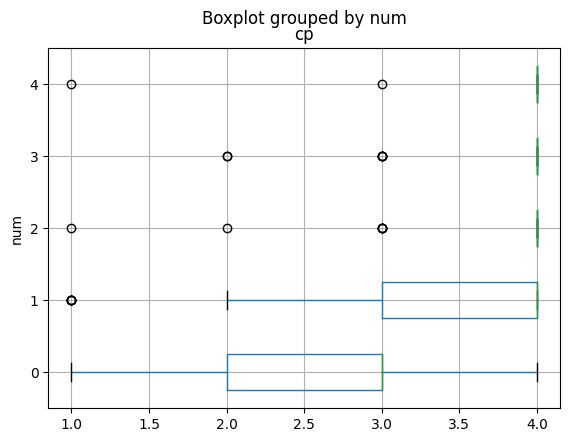

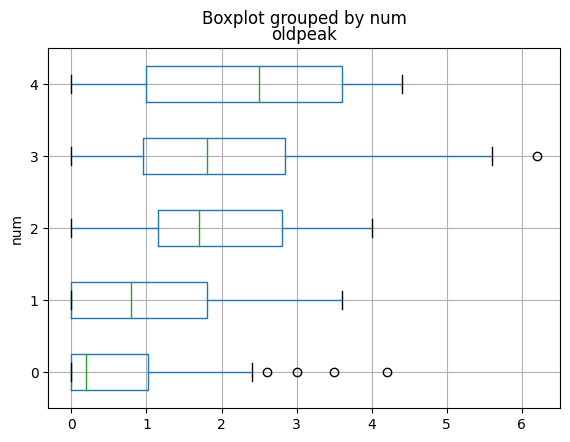

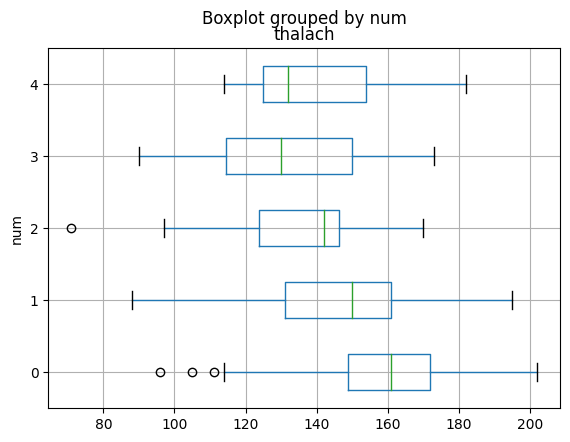

In [119]:
df.boxplot(column=['cp'], by='num', vert=False)
df.boxplot(column=['oldpeak'], by='num', vert=False)
df.boxplot(column=['thalach'], by='num', vert=False)

plt.show()

## Section 4: Data Science

**Question:** Which categories show the highest correlation with the classification

**Response:** Visualize each category via a box plot

The plots above show clear correlations. Other plots didn't. I removed a few that showed little correlation if any. 

Another tool I used was the correlation matrix/heat map. I had to clean the data because our data type was in the wrong format for the matrix.

From these, we can see the three main features determining heart disease in patients would be cp, oldpeak, and num. 

In [120]:
# Cleaning the data
df = df.replace('?', np.nan)
df = df.dropna()

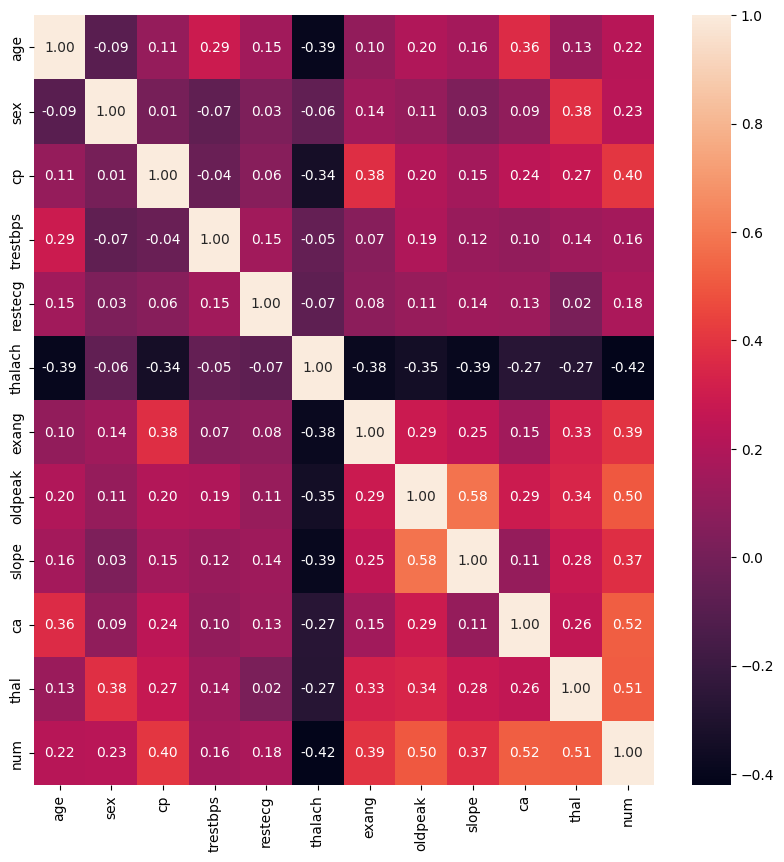

In [121]:
# Correlation Matrix

# Calculate correlation matrix
corr = df[features + target].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

## Section 5: Overall Summary

